# Google Drive 마운트 하기





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#경로 설정
import os
os.chdir('/content/drive/My Drive/')

In [3]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/MyDrive/data/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [5]:
pip install konlpy

# 키워드 추출

텍스트 데이터 전처리

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data/book_data_소설.csv', encoding='cp949')
df.head()

,id,title,intro
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...
2,157973_9788995501443,\n꾸뻬 씨의 행복 여행,진정한 행복을 찾아 나선 꾸뻬 씨의 여행!파리의 정신과 의사 꾸뻬 씨가 전하는 특별...
3,15986987_9791158884857,부서진 대지 3부작 세트,"휴고 상(3회)·네뷸러 상·로커스 상 석권, 『타임』 역대 최고 판타지 100선 선..."
4,16033604_9791196862602,결코 늦지 않았다,백화만발의 ‘시니어 그림책’ 시리즈 4권. 정년 퇴임한 김팔복 씨가 하고 싶은 일을...


In [7]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [8]:
# ‘id’ 피처에 이를 적용합니다.
df['ko_id'] = df['id'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,
2,157973_9788995501443,\n꾸뻬 씨의 행복 여행,진정한 행복을 찾아 나선 꾸뻬 씨의 여행!파리의 정신과 의사 꾸뻬 씨가 전하는 특별...,
3,15986987_9791158884857,부서진 대지 3부작 세트,"휴고 상(3회)·네뷸러 상·로커스 상 석권, 『타임』 역대 최고 판타지 100선 선...",
4,16033604_9791196862602,결코 늦지 않았다,백화만발의 ‘시니어 그림책’ 시리즈 4권. 정년 퇴임한 김팔복 씨가 하고 싶은 일을...,


In [9]:
# ‘title’ 피처에 이를 적용합니다.
df['ko_title'] = df['title'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id,ko_title
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,,달러구트 꿈 백화점 세트전권
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,,거기 내가 가면 안 돼요
2,157973_9788995501443,\n꾸뻬 씨의 행복 여행,진정한 행복을 찾아 나선 꾸뻬 씨의 여행!파리의 정신과 의사 꾸뻬 씨가 전하는 특별...,,꾸뻬 씨의 행복 여행
3,15986987_9791158884857,부서진 대지 3부작 세트,"휴고 상(3회)·네뷸러 상·로커스 상 석권, 『타임』 역대 최고 판타지 100선 선...",,부서진 대지 부작 세트
4,16033604_9791196862602,결코 늦지 않았다,백화만발의 ‘시니어 그림책’ 시리즈 4권. 정년 퇴임한 김팔복 씨가 하고 싶은 일을...,,결코 늦지 않았다


In [10]:
# ‘intro’ 피처에 이를 적용합니다.
df['ko_intro'] = df['intro'].apply(lambda x: text_cleaning(x))
df.head()

,id,title,intro,ko_id,ko_title,ko_intro
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,,달러구트 꿈 백화점 세트전권,달러구트 꿈 백화점 주문하신 꿈은 매진입니다잠들어야만 입장할 수 있는 독특한 마을...
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,,거기 내가 가면 안 돼요,청소년문학의 아이콘 이금이 작가가 작가 생활 년 만에 처음 쓴 역사소설 논 서 마지...
2,157973_9788995501443,\n꾸뻬 씨의 행복 여행,진정한 행복을 찾아 나선 꾸뻬 씨의 여행!파리의 정신과 의사 꾸뻬 씨가 전하는 특별...,,꾸뻬 씨의 행복 여행,진정한 행복을 찾아 나선 꾸뻬 씨의 여행파리의 정신과 의사 꾸뻬 씨가 전하는 특별한...
3,15986987_9791158884857,부서진 대지 3부작 세트,"휴고 상(3회)·네뷸러 상·로커스 상 석권, 『타임』 역대 최고 판타지 100선 선...",,부서진 대지 부작 세트,휴고 상회네뷸러 상로커스 상 석권 타임 역대 최고 판타지 선 선정인류의 뿌리 깊은 ...
4,16033604_9791196862602,결코 늦지 않았다,백화만발의 ‘시니어 그림책’ 시리즈 4권. 정년 퇴임한 김팔복 씨가 하고 싶은 일을...,,결코 늦지 않았다,백화만발의 시니어 그림책 시리즈 권 정년 퇴임한 김팔복 씨가 하고 싶은 일을 찾지 ...


In [11]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전
korean_stopwords_path = "/content/drive/MyDrive/data/stopword.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [12]:
df['nouns'] = df['ko_intro'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(4250, 7)


,id,title,intro,ko_id,ko_title,ko_intro,nouns
0,0100023009445_20844891,달러구트 꿈 백화점 12 세트전2권,[달러구트 꿈 백화점 : 주문하신 꿈은 매진입니다]?잠들어야만 입장할 수 있는 독특...,,달러구트 꿈 백화점 세트전권,달러구트 꿈 백화점 주문하신 꿈은 매진입니다잠들어야만 입장할 수 있는 독특한 마을...,"[달러, 구트, 백화점, 주문, 매진, 입장, 마을, 손님, 인기, 온갖, 판매, ..."
1,10624152_9788958289906,거기 내가 가면 안 돼요2,청소년문학의 아이콘 이금이 작가가 작가 생활 30년 만에 처음 쓴 역사소설. 논 서...,,거기 내가 가면 안 돼요,청소년문학의 아이콘 이금이 작가가 작가 생활 년 만에 처음 쓴 역사소설 논 서 마지...,"[청소년, 문학, 아이콘, 생활, 처음, 역사소설, 마지기, 자작, 채령, 생일, ..."
2,157973_9788995501443,\n꾸뻬 씨의 행복 여행,진정한 행복을 찾아 나선 꾸뻬 씨의 여행!파리의 정신과 의사 꾸뻬 씨가 전하는 특별...,,꾸뻬 씨의 행복 여행,진정한 행복을 찾아 나선 꾸뻬 씨의 여행파리의 정신과 의사 꾸뻬 씨가 전하는 특별한...,"[행복, 나선, 꾸뻬, 여행, 파리, 정신과, 의사, 꾸뻬, 전하, 행복, 꾸뻬, ..."
3,15986987_9791158884857,부서진 대지 3부작 세트,"휴고 상(3회)·네뷸러 상·로커스 상 석권, 『타임』 역대 최고 판타지 100선 선...",,부서진 대지 부작 세트,휴고 상회네뷸러 상로커스 상 석권 타임 역대 최고 판타지 선 선정인류의 뿌리 깊은 ...,"[휴고, 상회, 뷸러, 로커, 석권, 타임, 역대, 최고, 판타지, 선정, 인류, ..."
4,16033604_9791196862602,결코 늦지 않았다,백화만발의 ‘시니어 그림책’ 시리즈 4권. 정년 퇴임한 김팔복 씨가 하고 싶은 일을...,,결코 늦지 않았다,백화만발의 시니어 그림책 시리즈 권 정년 퇴임한 김팔복 씨가 하고 싶은 일을 찾지 ...,"[백화, 발의, 시니어, 그림책, 시리즈, 정년, 퇴임, 팔복, 방황, 보디빌더, ..."


# 연관 분석을 이용한 키워드 분석

연관 키워드 추출

In [13]:
pip install apyori

In [14]:
from apyori import apriori

# 지지도 (supprot): P(A∩B)
result=(list(apriori(df['nouns'], min_support=0.03)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))

# 두 단어의 연관성을 나타내며 0.03 지지도 이상 추출
df = df[(df['length'] == 2) &
        (df['support'] >= 0.03)].sort_values(by='support', ascending=False)

df.head(10)

,items,support,ordered_statistics,length
252,"(소설, 사람)",0.129412,"[((), (소설, 사람), 0.12941176470588237, 1.0), ((사...",2
274,"(세계, 소설)",0.114118,"[((), (세계, 소설), 0.11411764705882353, 1.0), ((세...",2
264,"(소설, 사랑)",0.105412,"[((), (소설, 사랑), 0.10541176470588236, 1.0), ((사...",2
247,"(사람, 사랑)",0.091294,"[((), (사람, 사랑), 0.09129411764705882, 1.0), ((사...",2
234,"(문학, 소설)",0.090588,"[((), (문학, 소설), 0.09058823529411765, 1.0), ((문...",2
293,"(인간, 소설)",0.087294,"[((), (인간, 소설), 0.08729411764705883, 1.0), ((소...",2
251,"(세계, 사람)",0.074588,"[((), (세계, 사람), 0.07458823529411765, 1.0), ((사...",2
294,"(소설, 인물)",0.068941,"[((), (소설, 인물), 0.06894117647058824, 1.0), ((소...",2
288,"(역사, 소설)",0.063529,"[((), (역사, 소설), 0.06352941176470588, 1.0), ((소...",2
270,"(사회, 소설)",0.062353,"[((), (사회, 소설), 0.06235294117647059, 1.0), ((사...",2


In [15]:
pip install networkx

In [16]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# networkx 그래프 정의
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [18]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [19]:
# 레이아웃
pos = nx.spring_layout(G)
# pos = nx.dodecahedral_layout(G)
# pos = nx.rescale_layout(G)

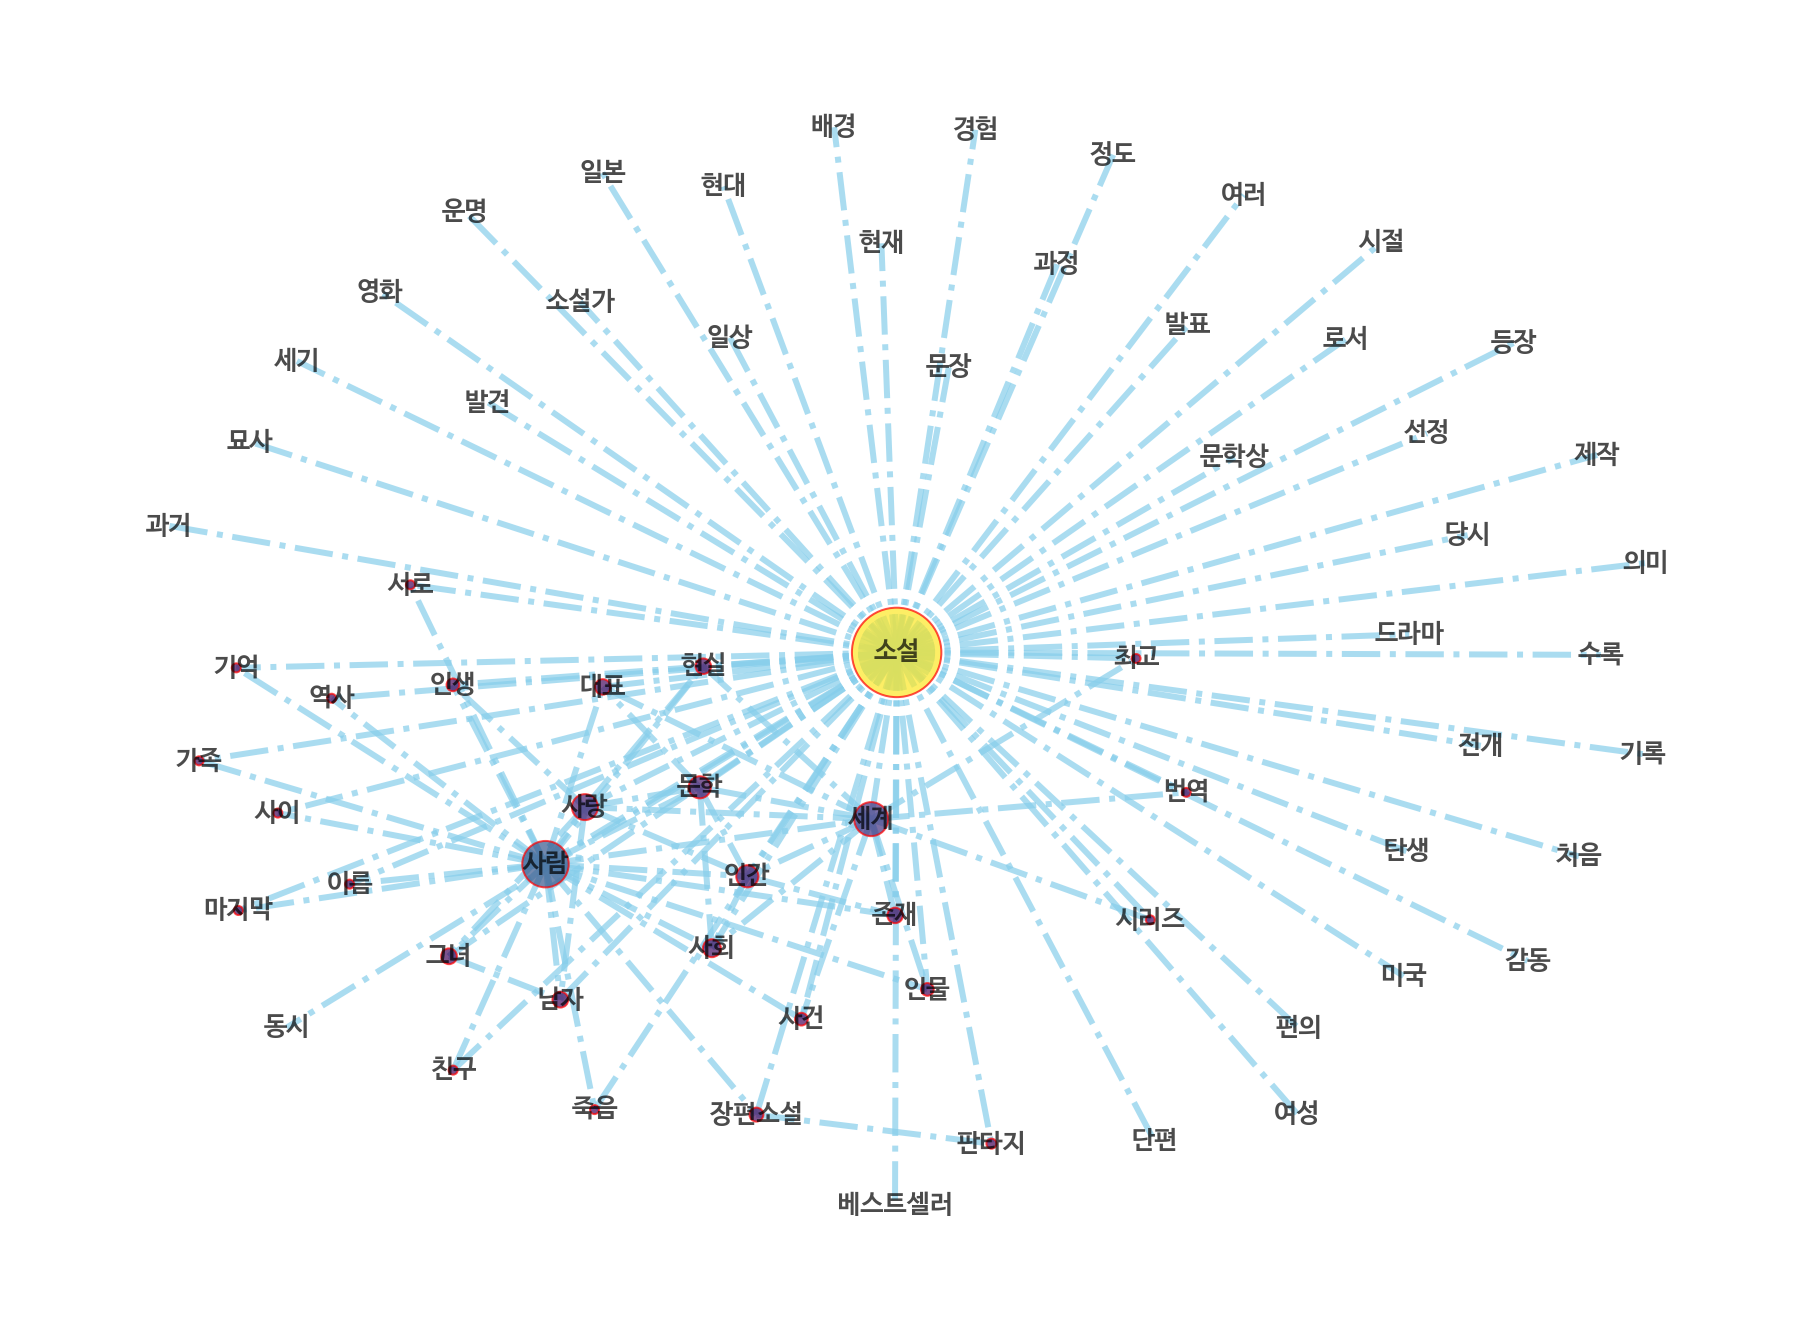

In [20]:
# 네트워크 그래프
plt.figure(figsize = (16, 12)); plt.axis('off')
nx.draw_networkx(G, font_family='NanumBarunGothic', font_size = 13, font_weight='bold',
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha = 0.7, width = 3, edge_color = 'skyblue', edgecolors='red', style = '-.')